# Homework 1

## Overview
This homework will walk you through the process of geospatial data analysis under the short-term rental market (Airbnb) context in New York City. Through this practice, you will get more familiar with pandas, numpy, geopandas, seaborn, and matplotlib modules to retrieve, clean, and visulaize geospatial data. 

## Grading
Each exercise will be graded based on the following rubrics:
- 2 points. Completed the task, presented the expected results, and codes were well documented and explained.
- 1 point. Completed the task with some disparity from the expected results.
- 0 point. Did not complete the excercise.

## Late submission policy
For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

## 1. Retrieve Data
### 1.1 Read the Airbnb Data (2 points)
The first step is to retrieve two datasets from oline resrouces and read one given dataset. Two online resources include the Airbnb lisitng information and the census tract of New York City.

Go to the Airbnb data warehouse http://insideairbnb.com/get-the-data/ and find New York City section:
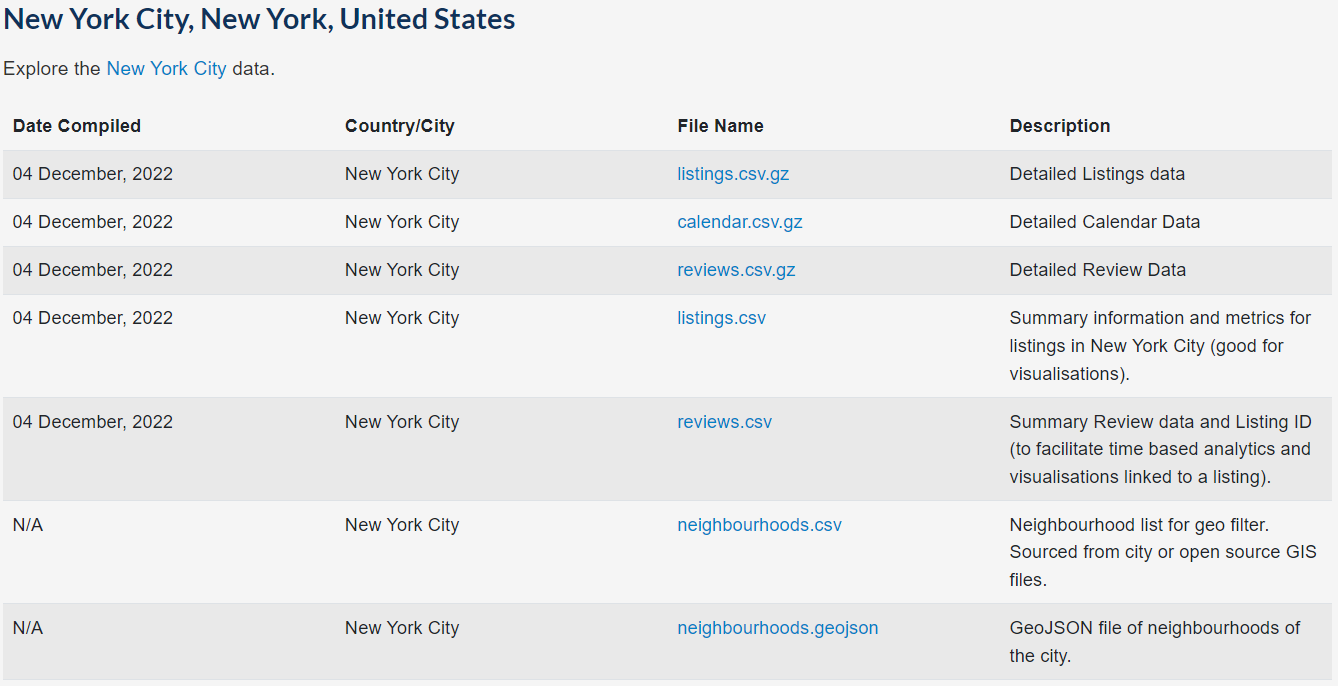

Right click on the hyperlink of the first row and copy the link. Name the dataframe as **listing_raw**. Present the first 5 rows below.

In [ ]:
### enter your code here

### 1.2 Retrieve the Census Tracts of New York City (2 points)
Go to NYC Department of planning (https://www.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page). Unfold the *Census Blocks and Tracts* tab and copy the *GeoJSON* link of *2020 Census Tracts (Clipped to shoreline)*.
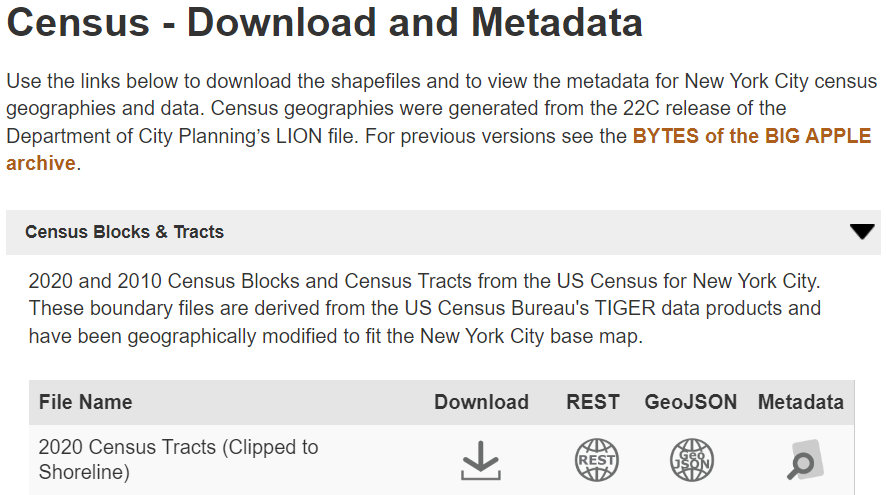

After reading GeoJSON file from the url, assign the dataframe with WGS 84 Geodetic System (epsg = 4326) and name the dataframe as **ct**. Show the first 5 rows of the **ct**.

In [ ]:
url = ### enter your code here
ct = gpd.read_file(url).to_crs(### enter your code here)
ct.head()

### 1.3 Read the Local Dataset (2 points)
Read the demographic information from the given csv file and name it as **demo**. Show the information of **demo** with the function .info().

In [ ]:
### enter your code here

## 2. Data Wrangling/Cleaning
### 2.1 Rename the Columns of **ct** (2 points)
Rename the column of *BoroName* as *borough_ct* and column of *NTAName* as *tract_ct*. Show the first 5 rows of **ct**.

In [ ]:
### enter your code here

### 2.2 Generate GeometryArray from Latitude and Longitude (2 points)
To conduct geospatial analysis, the geospatial information must be specified. For example, **listing_raw** dataframe contains *latitude* and *longitude* columns, but both columns are treated as the same as the other numeric columns. To specify such geospatial information, an GeometryArray, which contains arrays of positional coordinates to describe Points, needs to be generated.

Now generate an GeometryArray based on the *latitude* and *longitude* columns in **listing_raw** and name the GeometryArray as **geometry**.

In [ ]:
geometry = gpd.points_from_xy(### enter your code here)

### 2.3 Transform Dataframe into Geo-dataframe (2 points)
A dataframe can be transformed into a geo-dataframe by adding *geometry* column, which must contain GeometryArray or GeoSeries. With the *geometry* generated above, transform **listing_raw** dataframe into **listing_g** geo-dataframe and assign the dataframe with WGS 84 Geodetic System (epsg = 4326). Present the first 5 rows.

In [ ]:
### enter your code here

### 2.4 Remove nan Values (2 points)
Remove all n/a values from *bed* column and drop *bathrooms, calendar_updated, license, and neighbourhood* columns in **listing_g** and name the new dataframe as **listing_s**. Show the first 5 rows of **listing_s**.

In [ ]:
### enter your code here

### 2.5 Formatting Column Values (2 points)
For statistical purpose, *price* in the Airbnb listing table must be numeric. In the following cell, remove dollar sign and comma from *price* column in **listing_s** and then transforme the column into float type. Show the first 5 rows of listing_s.

In [ ]:
### enter your code here

### 2.6 Unify Column Types of *GEOID* in **ct** and **demo** (2 points)

To merge **ct** and **demo**, *GEOID* will be used as the primary key for both dataframes. However, *GEOID* in **ct** is object but *GEOID* in **demo** is int. Therefore, *GEOID* in both dataframes need to be converted into string.

In [ ]:
### enter your code here

### 2.7 Merge **ct** and **demo** Dataframes (2 points)
Once *GEOID* in both dataframes are in the same type, **ct** and **demo** can be joined. Select only *GEOID*, *borough_ct*, *tract_ct*, and *geometry* columns from **ct** and merge them into **demo**. Present the first 5 rows of the merged dataframe **ct_demo** below.

In [ ]:
### enter your code here

Though **ct** has been read as geo-dataframe in step 1.2, the merged dataframe **ct_demo** is treated as a dataframe by default. To transform **ct_demo** into a geo-dataframe, you only need to specify the *geometry* in **ct** as the *geometry* of **ct_demo**. Name the new geo-dataframe as **ct_demo_g** and present the first 5 rows.

In [ ]:
### enter your code here

### 2.8 Merge Dataframes by Spatial Join (2 points)
Now all information has been stored in geo-dataframe: the census tract and demographic information have been merged into **ct_demo_g** and the Airbnb listing in **listing_s**. However, **ct_demo_g** is based on census tracts (polygons) while **listing_s** is on points. To locate the listing at the census tract level, you are asked to spatial join **listing_s** to **listing_s** if the apartment/house falls into a census tract. Name this new geo-dataframe as **listing**. Remember *geometry* in **listing** should be Points.  Show the first 5 rows below.

In [ ]:
listing = gpd.tools.sjoin(### enter your code here)
listing.head()

## 3. Data Analysis
### 3.1 Mean Listing Price by Borough (2 points)
Find the mean listing price in each borough of New York City and list them below.

In [ ]:
### enter your code here

### 3.2 The Most and Least Expensive Census Tracts in NYC (2 points)
Find the 5 most expensive and the 5 least expensive census tracts based on the median price across New York City. You can present the results in seperate cells.

In [ ]:
### enter your code here

### 3.3 The Most and Least Expensive Census Tracts in Manhattan (2 points)
Find the 5 most expensive neighborhoods (using median price) in Manhattan borough. You can present the results in seperate cells. Are they consistent with the 5 most expensive neighborhoods in New York City?

In [ ]:
### enter your code here

In [ ]:
### enter your code here

### 3.4 The Number of Listing in Each Census Tract (2 points)
Calculate the number of listing in each census tract using group_by function. Add this new column to **ct_demo_g** and create a new geo-dataframe **ct_demo_g_count**. Show the full list below.

In [ ]:
### enter your code here

## 4 Visualize Data
### 4.1 Relationship between the Price and Household Income (2 points)
*hh_income* column contains the median household income by each census tract. Use the median listing price as the y axis and the household income as the x axis to draw scatter plot below.

In [ ]:
### enter your code here

### 4.2 Relationship between the Price and Housing Value (2 points)
*house_value* column contains the median housing value by each census tract. Use the median listing price as the y axis and the housing value as the x axis to draw scatter plot below.

In [ ]:
### enter your code here

### 4.3 Mapping the Listing and Census Tracts (8 points)
Plot all the listing and census tracts on the same figure. 
- Change the title to *2022 New York City Airbnb Listing* and name the x-y axis as longitude and latitude. (2 points)

Out of aesthetic purpose, 
- Change the transparency of census tracts and listing points to 0.2. (2 points) 
- Change the size of listing points to 0.4. (2 points)
- Add *grey* edge color to census tracts. (2 points)

Show your map below.

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
plt.title(### enter your code here)
plt.xlabel(### enter your code here)
plt.ylabel(### enter your code here)

ct_demo_g.plot(### enter your code here)
listing.plot(### enter your code here)

### 4.4 Choropleth Map on the Number of Listing (8 points)
Plot the number of listing by census tracts. 
- Change the title to *2022 New York City Airbnb: the Number of Listing by Census Tract* and name the x-y axis as longitude and latitude. (2 points)
- Use *quantile* as the scheme and specify the quantile number as 5. Use color set *OrRd*. (2 points)

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract. (2 points) 
- Add *grey* edge color to census tracts and specify the edge width as 0.2. (2 points)

In [ ]:
import mapclassify
fig, ax = plt.subplots(figsize=(6, 6))
plt.title(### enter your code here)
plt.xlabel(### enter your code here)
plt.ylabel(### enter your code here)

ct_demo_g_count.plot(ax=ax, ### enter your code here)

### 4.4 Choropleth Map on the Median Housing Value (2 points)
Plot the median housing value by census tracts. 
- Change the title to *2022 New York City Airbnb: the Median Housing Value by Census Tract* and name the x-y axis as longitude and latitude.
- Use *quantile* as the scheme and specify the quantile number as 5. Use color set *OrRd*.

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract.
- Add *grey* edge color to census tracts and specify the edge width as 0.2.

In [ ]:
### enter your code here

### 4.4 Choropleth Map on the Median Household Income (2 points)
Plot the median household income by census tracts.
- Change the title to *2022 New York City Airbnb: the Median Household Income by Census Tract* and name the x-y axis as longitude and latitude.
- Use quantile as the scheme and specify the quantile number as 5. Use color set *BuPu*.

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract.
- Add grey edge color to census tracts and specify the edge width as 0.2.

In [ ]:
### enter your code here